## Test d'import des fonctions 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from models import CNN #, ResNet
from hmc import initialize_weights, HMC_sampling, set_model_params
from eval import evaluate_models, evaluate_single_model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Chargement de MNIST

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])  # MNIST est en niveaux de gris

# Dataloaders
batch_size = 64
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, drop_last=True) # drop_last to stack the outputs and target later"""

#### Influence de la variance du prior

In [ ]:
# Liste des variances du prior à tester
prior_var_to_try = [1/40, 1/20, 1/10, 1/5, 1]

# Hyperparamètres
#trajectory_length = (np.pi * prior_std) / 2
step_size = 0.0005  # delta
n_leapfrog = 20  # int(trajectory_length // step_size) # paper
n_burnin = 40
n_samples = 120
n_classes = 10

# Initialisation des résultats
accuracies = []
log_likelihoods = []
eces = []

# Test de chaque variance du prior
for prior_var in prior_var_to_try:
    # Calcul de l'écart-type du prior
    prior_std = np.sqrt(prior_var)

    # Initialisation du modèle
    model = CNN(output_dim=10).to(device)
    initialize_weights(model, mean=0.0, std=prior_std)
    theta = [p.clone().detach().to(device) for p in model.parameters()]  # Déplacer les paramètres du modèle sur le GPU

    samples = HMC_sampling(model, theta, train_loader, step_size, n_leapfrog, n_burnin, n_samples, decice=device)
    results = evaluate_models(model, test_loader, samples, device=device, n_classes=10, prior_std=prior_std)

    # Stockage des résultats
    accuracies.append(results["accuracy"])
    log_likelihoods.append(results['log_likelihood'])
    eces.append(results["ECE"])

Sampling phase: 100%|██████████| 120/120 [01:26<00:00,  1.38it/s]


Sampling finished. 120 samples with 0.9666666666666667 acceptance_ratio.


Sampling phase: 100%|██████████| 120/120 [01:29<00:00,  1.34it/s]


Sampling finished. 120 samples with 0.9416666666666667 acceptance_ratio.


Sampling phase: 100%|██████████| 120/120 [02:07<00:00,  1.06s/it]


Sampling finished. 120 samples with 0.6583333333333333 acceptance_ratio.


Sampling phase: 100%|██████████| 120/120 [01:41<00:00,  1.18it/s]


Sampling finished. 120 samples with 0.425 acceptance_ratio.


Sampling phase: 100%|██████████| 120/120 [01:24<00:00,  1.41it/s]


Sampling finished. 120 samples with 0.475 acceptance_ratio.


Predicting the test set: 100%|██████████| 156/156 [03:50<00:00,  1.48s/it]


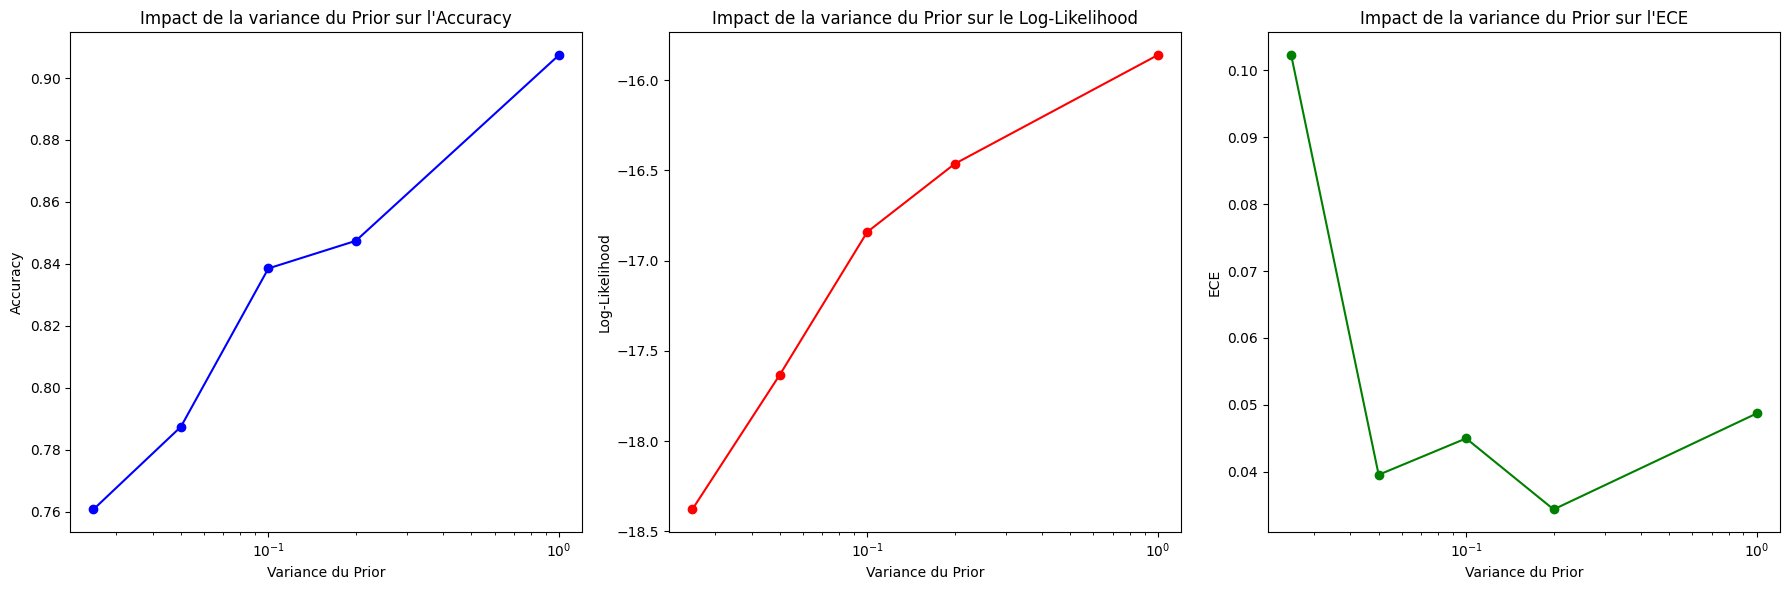

In [ ]:
# Affichage des résultats
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Graphique pour l'accuracy
ax[0].plot(prior_var_to_try, accuracies, marker='o', linestyle='-', color='b')
ax[0].set_xlabel('Prior variance')
ax[0].set_ylabel('Accuracy')
ax[0].set_xscale('log')

# Graphique pour le Log-Likelihood
log_likelihoods = [ll/1000 for ll in log_likelihoods]
ax[1].plot(prior_var_to_try, log_likelihoods, marker='o', linestyle='-', color='r')
ax[1].set_xlabel('Prior variance')
ax[1].set_ylabel('Log-Likelihood')
ax[1].set_xscale('log')

# Graphique pour l'ECE
ax[2].plot(prior_var_to_try, eces, marker='o', linestyle='-', color='g')
ax[2].set_xlabel('Prior variance')
ax[2].set_ylabel('ECE')
ax[2].set_xscale('log')

# Affichage des graphiques
plt.tight_layout()
plt.show()

### Influence de la température du posterior

In [ ]:
# Liste des variances du prior à tester
posterior_temp_to_try = [0.03, 0.3, 1, 3, 10]

# Hyperparamètres
prior_var=1
prior_std = np.sqrt(prior_var)
#trajectory_length = (np.pi * prior_std) / 2
step_size = 0.0005  
n_leapfrog = 20  
n_burnin = 40
n_samples = 120
n_classes = 10

# Initialisation des résultats
accuracies = []
log_likelihoods = []
eces = []

# Test de chaque variance du prior
for temp in posterior_temp_to_try:
    
    # Initialisation du modèle
    model = CNN(output_dim=10).to(device)
    initialize_weights(model, mean=0.0, std=prior_std)
    theta = [p.clone().detach().to(device) for p in model.parameters()]  # Déplacer les paramètres du modèle sur le GPU

    samples = HMC_sampling(model, theta, train_loader, step_size, n_leapfrog, n_burnin, n_samples, temperature=temp, device=device)
    results = evaluate_models(model, test_loader, samples, device=device, n_classes=10, prior_std=prior_std)

    # Stockage des résultats
    accuracies.append(results["accuracy"])
    log_likelihoods.append(results['log_likelihood'])
    eces.append(results["ECE"])

Sampling phase: 100%|██████████| 120/120 [01:35<00:00,  1.26it/s]


Sampling finished. 120 samples with 0.0 acceptance_ratio.


Sampling phase: 100%|██████████| 120/120 [01:35<00:00,  1.26it/s]


Sampling finished. 120 samples with 0.25833333333333336 acceptance_ratio.


Sampling phase: 100%|██████████| 120/120 [01:31<00:00,  1.32it/s]


Sampling finished. 120 samples with 0.38333333333333336 acceptance_ratio.


Sampling phase: 100%|██████████| 120/120 [02:30<00:00,  1.25s/it]


Sampling finished. 120 samples with 0.44166666666666665 acceptance_ratio.


Sampling phase: 100%|██████████| 120/120 [03:47<00:00,  1.89s/it]


Sampling finished. 120 samples with 0.39166666666666666 acceptance_ratio.


Predicting the test set: 100%|██████████| 156/156 [10:45<00:00,  4.14s/it]


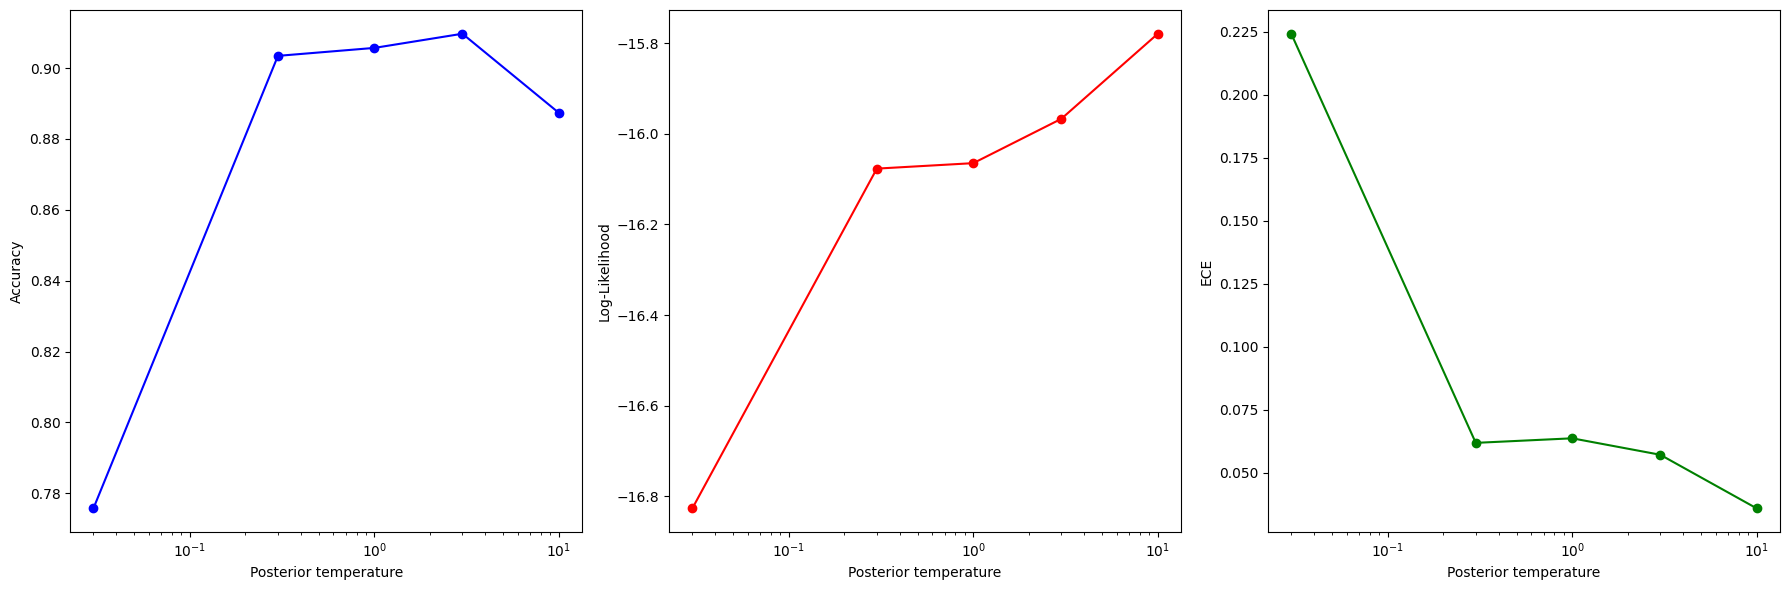

In [8]:
# Affichage des résultats
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Graphique pour l'accuracy
ax[0].plot(posterior_temp_to_try, accuracies, marker='o', linestyle='-', color='b')
ax[0].set_xlabel('Posterior temperature')
ax[0].set_ylabel('Accuracy')
ax[0].set_xscale('log')

# Graphique pour le Log-Likelihood
log_likelihoods = [ll/1000 for ll in log_likelihoods]
ax[1].plot(posterior_temp_to_try, log_likelihoods, marker='o', linestyle='-', color='r')
ax[1].set_xlabel('Posterior temperature')
ax[1].set_ylabel('Log-Likelihood')
ax[1].set_xscale('log')

# Graphique pour l'ECE
ax[2].plot(posterior_temp_to_try, eces, marker='o', linestyle='-', color='g')
ax[2].set_xlabel('Posterior temperature')
ax[2].set_ylabel('ECE')
ax[2].set_xscale('log')

# Affichage des graphiques
plt.tight_layout()
plt.show()

### Test SGD vs HMC

In [ ]:
# Hyperparamètres
prior_var=1
prior_std = np.sqrt(prior_var)
temp=1
#trajectory_length = (np.pi * prior_std) / 2
step_size = 0.0005  
n_leapfrog = 20  
n_burnin = 0
n_samples = 200
n_classes = 10

# Initialisation des résultats
accuracies = []
log_likelihoods = []
eces = []

# Initialisation du modèle
model = CNN(output_dim=10).to(device)
initialize_weights(model, mean=0.0, std=prior_std)
theta = [p.clone().detach().to(device) for p in model.parameters()]  # Déplacer les paramètres du modèle sur le GPU

samples = HMC_sampling(model, theta, train_loader, step_size, n_leapfrog, n_burnin, n_samples, temperature=temp, device=device)

Burn in phase: 0it [00:00, ?it/s]
Sampling phase: 100%|██████████| 200/200 [03:05<00:00,  1.08it/s]

Sampling finished. 200 samples with 0.41 acceptance_ratio.


Predicting the test set: 100%|██████████| 156/156 [00:03<00:00, 42.46it/s]


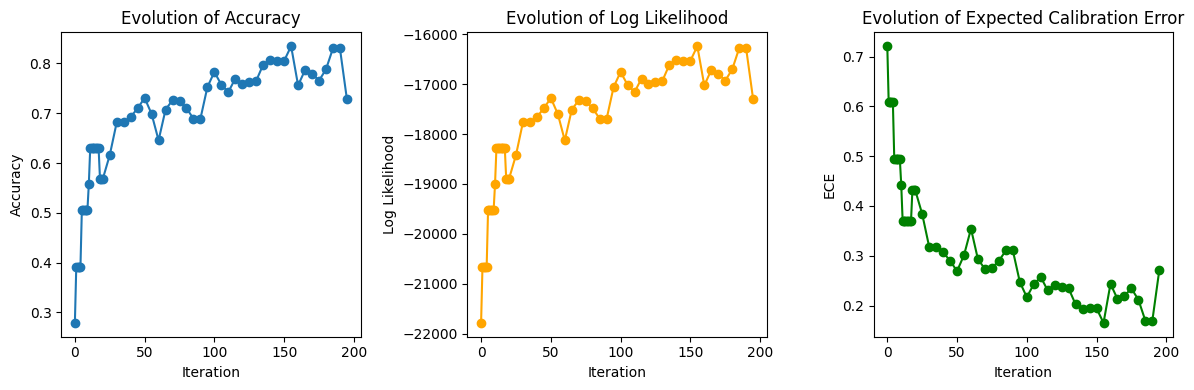

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Listes pour stocker les métriques
accuracies, log_likelihoods, eces = [], [], []

# Définition de la fréquence d'échantillonnage
n_samples = len(samples)
indices = np.unique(
    np.concatenate([
        np.arange(0, 20, 1),       # Évaluation fréquente au début (chaque sample jusqu'à 20)
        np.arange(20, n_samples, 5)  # Puis tous les 5 samples après 20
    ])
)

# Évaluation des samples sélectionnés
for i in indices:
    sample = samples[i]

    # Initialisation du modèle
    model = CNN(output_dim=10).to(device)
    set_model_params(model, sample)
    
    # Évaluation du modèle avec le sample
    results = evaluate_single_model(model, test_loader, sample, device=device, n_classes=10, verbose=False)

    # Stockage des résultats
    accuracies.append(results["accuracy"])
    log_likelihoods.append(results['log_likelihood'])
    eces.append(results["ECE"])

# Affichage des résultats
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(indices, accuracies, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Evolution of Accuracy")

plt.subplot(1, 3, 2)
plt.plot(indices, log_likelihoods, marker='o', color="orange")
plt.xlabel("Iteration")
plt.ylabel("Log Likelihood")
plt.title("Evolution of Log Likelihood")

plt.subplot(1, 3, 3)
plt.plot(indices, eces, marker='o', color="green")
plt.xlabel("Iteration")
plt.ylabel("ECE")
plt.title("Evolution of Expected Calibration Error")

plt.tight_layout()
plt.show()


Comparison avec supervisé

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Initialisation du modèle
model = CNN(output_dim=10).to(device)

# Définition de l'optimiseur et de la fonction de perte
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# Nombre d'époques
num_epochs = 10

# Listes pour stocker les métriques
train_accuracies, train_log_likelihoods = [], []
test_accuracies, test_log_likelihoods = [], []

# Fonction d'évaluation du modèle
def evaluate(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    log_likelihood = 0.0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            
            # Calcul de la log-vraisemblance (négative de la loss)
            log_likelihood -= criterion(output, target).item() * data.size(0)
            
            # Calcul de l'accuracy
            preds = output.argmax(dim=1)
            correct += (preds == target).sum().item()
            total += target.size(0)

    accuracy = correct / total
    return accuracy, log_likelihood / total

# Boucle d'entraînement
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for data, target in train_loader:
        data, target = data.to(device), target.to(device)

        # Forward
        output = model(data)
        loss = criterion(output, target)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Évaluation sur train et test
    train_acc, train_loglik = evaluate(model, train_loader)
    test_acc, test_loglik = evaluate(model, test_loader)

    # Stockage des métriques
    train_accuracies.append(train_acc)
    train_log_likelihoods.append(train_loglik)
    test_accuracies.append(test_acc)
    test_log_likelihoods.append(test_loglik)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Train LL: {train_loglik:.4f}, Test LL: {test_loglik:.4f}")

# Affichage des résultats
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label="Train")
plt.plot(range(1, num_epochs + 1), test_accuracies, label="Test", linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Evolution of Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_log_likelihoods, label="Train", color="orange")
plt.plot(range(1, num_epochs + 1), test_log_likelihoods, label="Test", linestyle="--", color="red")
plt.xlabel("Epoch")
plt.ylabel("Log Likelihood")
plt.title("Evolution of Log Likelihood")
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10 - Train Acc: 0.9839, Test Acc: 0.9826, Train LL: -0.0513, Test LL: -0.0525
Epoch 2/10 - Train Acc: 0.9925, Test Acc: 0.9900, Train LL: -0.0233, Test LL: -0.0315
Epoch 3/10 - Train Acc: 0.9952, Test Acc: 0.9891, Train LL: -0.0154, Test LL: -0.0329
Epoch 4/10 - Train Acc: 0.9962, Test Acc: 0.9899, Train LL: -0.0116, Test LL: -0.0315
Epoch 5/10 - Train Acc: 0.9972, Test Acc: 0.9901, Train LL: -0.0091, Test LL: -0.0313


KeyboardInterrupt: 